# **Multiclass Image Classification**

We use image classification for recognising objects in the image and can be used in detecting brand names using logo, classifying objects, etc. But these solutions have a limitation that they can just recognise the objects but they cannot find the location of the object. But for recognising the objects these image classification models are easy to implement compared to object localisation.

## **Popular Models for the Image Classification**

We can use VGG -16,19, Resnet, Inception v1,v2,v3, Wideresnt, Resnext, DenseNet etc, which are the advanced variants of a convolutional neural network. These are the popular image classification networks and used as the backbone for many state-of-the-art object detection and segmentation algorithms.

## **Image Classification using FasAI library**

We will implement this work in the following steps:-

1. Selecting Hardware Accelerator

If you have GPU/TPU accelerator, then enable else we contine with Step-2

2. Loading FastAI library

In [ ]:
!python -m pip install pip --upgrade --user -q --no-warn-script-location
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn tensorflow keras opencv-python pillow scikit-image --user -q --no-warn-script-location

import IPython
IPython.Application.instance().kernel.do_shutdown(True)


In [1]:
#In the below code snippet, we will import the fastAI library. 
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

3. Customised Dataset

In [2]:
!git clone https://github.com/Ayushprasad28/Multi-Class-Flower-Classification.git

Cloning into 'Multi-Class-Flower-Classification'...
remote: Enumerating objects: 4348, done.
remote: Total 4348 (delta 0), reused 0 (delta 0), pack-reused 4348
Receiving objects: 100% (4348/4348), 236.57 MiB | 38.90 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (4338/4338), done.


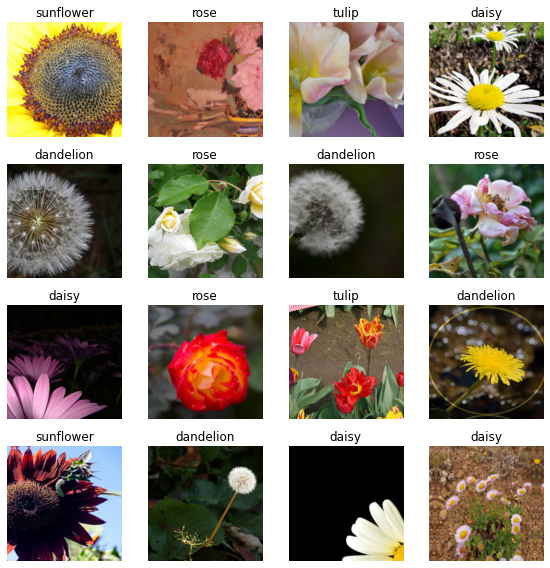

In [3]:
#In the below code snippet, you can also try with your customised dataset.
PATH = './Multi-Class-Flower-Classification/training_set'
np.random.seed(24)
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder(PATH, valid_pct=0.2, ds_tfms=tfms, size=299, bs=16).normalize(imagenet_stats)
data.show_batch(rows=4, figsize=(8, 8))

4. Loading Pre-Trained Deep Learning Model

In the below code snippet, we are going to import the VGG-19 batch_normalisation model. We will use this as an instance of the computer vision learner module of fastAI.

In [4]:
learn = cnn_learner(data, models.vgg19_bn, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


5. Training the Model

 In the below code snippet, we tried with one epoch. 

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


In [ ]:
con_matrix = ClassificationInterpretation.from_learner(learn)
con_matrix.plot_confusion_matrix()

6. Making Prediction using the Model

In the below code snippet, we can test our own image by giving the path of the image in test_your_image.

In [ ]:
test_your_image='./Multi-Class-Flower-Classification/test_set/daisy1.jpg'
test = open_image(test_your_image)
test.show()


In the below code snippet we can get the output tensor and which class it belongs.


In [ ]:
learn.predict(test)

As we can see in the above output, the model has predicted the class label for the input image that it belongs to the ‘flower’ category.

#**Related Articles:**

> * [FastAI with PyTorch for multiclass Image Classification](https://analyticsindiamag.com/fastai-with-tpu-in-pytorch-for-multiclass-image-classification/)

> * [SuffleNet V1 for Multiclass Image Classification](https://analyticsindiamag.com/complete-guide-to-shufflenet-v1-with-implementation-in-multiclass-image-classification/)

> * [Image Compression using K-Means Clustering](https://analyticsindiamag.com/beginners-guide-to-image-compression-using-k-means-clustering/)

> * [PCA for images](https://analyticsindiamag.com/how-does-pca-dimension-reduction-work-for-images/)

> * [Image Generation with Tensorflow Keras](https://analyticsindiamag.com/getting-started-image-generation-tensorflow-keras/)

> * [Getting Started with Computer Vision using Tensorflow Keras](https://analyticsindiamag.com/computer-vision-using-tensorflow-keras/)
